In [163]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
import json
from cilin import Cilin
from CompoTree import Radicals
from collections import Counter
from itertools import product, chain
from random import sample
from utils import *

In [165]:
C = Cilin(trad=True)
# documents = { k:list(v) for k, v in C.category_split(level=4).items() }

all_words = chain.from_iterable(C.category_split().values())
Tagger = RadicalSemanticTagger(all_words=all_words)

print(sample(Tagger.features, 10))
Tagger.encode_doc(documents['Aa01A'])

['人體精神_廚房器物', '顏色', '武器_廚房器物', '住宿_性質', '生命性質_生活器物', '人倫關係_城鄉', '穿著器物_人體四肢', 'NULL_動物軀體', 'NULL_無生命', '性質_人倫關係']


array([5, 6, 4, 0, 5, 0, 0, 3, 3, 0, 0, 1, 0, 1, 1, 0, 5, 6, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 3, 1, 0, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Document Term Matrix

`(n_docs, n_features)`

In [167]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer

# doc2id = { doc:i for i, doc in enumerate(documents.keys()) }
# id2doc = { v:k for k, v in doc2id.items() }

# count_mat = []
# for doc in doc2id:
#     doc = Tagger.encode_doc(documents[doc])
#     count_mat.append(doc)
# count_mat = np.array(count_mat)
# print(count_mat.shape)

# TF-IDF weighting
# idf = TfidfTransformer().fit(count_mat)
# # print(idf.idf_.shape)
# tf_idf_mat = idf.transform(count_mat) #.toarray()
# tf_idf_mat.toarray()
DTM = DocumentTermMatrix(RSTagger=Tagger, Cilin=C, level=4)
DTM.np

array([[0.19111676, 0.27320283, 0.22554483, ..., 0.        , 0.        ,
        0.        ],
       [0.03812616, 0.        , 0.33745695, ..., 0.        , 0.        ,
        0.        ],
       [0.16112282, 0.54382591, 0.31691289, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39206641, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [168]:
import numpy as np
import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix

df_feat = DTM.pd
df_feat.head()

,NULL,人,人倫關係,人體內部,人體四肢,人體性質,人體精神,人體頭部,住宿,動物軀體,...,顏色_性質,顏色_植物,顏色_武器,顏色_無生命,顏色_生命性質,顏色_生活器物,顏色_禮樂,顏色_穿著器物,顏色_野獸,顏色_顏色
0,0.191117,0.273203,0.225545,0.000000,0.193940,0.0,0.00000,0.134688,0.155677,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038126,0.000000,0.337457,0.000000,0.000000,0.0,0.00000,0.000000,0.051760,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.161123,0.543826,0.316913,0.064898,0.109002,0.0,0.12744,0.094625,0.036457,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100955,0.180394,0.223389,0.000000,0.000000,0.0,0.07985,0.177867,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
df_tgt = DTM.df_tgt
df_tgt

,lev1,lev2,lev3
0,A 人,Aa 人-泛稱,Aa01
1,A 人,Aa 人-泛稱,Aa01
2,A 人,Aa 人-泛稱,Aa01
3,A 人,Aa 人-泛稱,Aa01
4,A 人,Aa 人-泛稱,Aa02
...,...,...,...
4218,L 敬語,La 謙辭,La05
4219,L 敬語,La 謙辭,La06
4220,L 敬語,La 謙辭,La06
4221,L 敬語,La 謙辭,La06


In [170]:
for l in "lev1 lev2".split():
    print(Counter(df_tgt[l]))

Counter({'H 活動': 934, 'B 物': 689, 'E 特徵': 520, 'D 抽象事物': 465, 'A 人': 379, 'I 現象與狀態': 365, 'K 助語': 237, 'F 動作': 203, 'C 時空': 164, 'G 心理活動': 135, 'J 關聯': 113, 'L 敬語': 19})
Counter({'Hi 社交': 214, 'Hj 生活': 210, 'Ed 性質': 173, 'Ee 德才': 131, 'Fa 上肢動作': 122, 'Bp 用品': 110, 'Eb 表象': 109, 'Ka 疏狀': 108, 'Dk 文教': 102, 'Bo 機具': 91, 'Hc 行政管理': 91, 'Hd 生產': 88, 'Cb 空間': 86, 'If 境遇': 82, 'Ca 時間': 78, 'Da 事情 情況': 78, 'Hg 教衛科研': 75, 'Id 物體狀態': 74, 'Bi 動物': 73, 'Bn 建築物': 72, 'Ib 生理現象': 71, 'Gb 心理活動': 70, 'Di 社會 政法': 59, 'Ah 親人 眷屬': 58, 'He 經濟活動': 57, 'Ae 職業': 55, 'Bk 全身': 55, 'Bm 材料': 55, 'Aj 關係': 54, 'Ga 心理狀態': 51, 'Hb 軍事活動': 49, 'Kf 擬聲': 49, 'Ie 事態': 45, 'Dd 性能': 42, 'Ea 外形': 40, 'Df 意識': 39, 'Je 影響': 39, 'Fc 頭部動作': 38, 'Af 身份': 37, 'Br 食品 藥品 毒品': 37, 'Ak 品性': 36, 'Hn 惡行': 36, 'Ef 境況': 34, 'Ag 狀況': 33, 'Ec 顏色 味道': 33, 'Ih 變化': 33, 'Ia 自然現象': 31, 'Jd 存在': 31, 'Kc 聯接': 31, 'Ba 統稱': 28, 'Fd 全身動作': 28, 'Bh 植物': 26, 'Hm 公安 司法': 26, 'Hf 交通運輸': 25, 'Db 事理': 24, 'Bg 自然物': 23, 'Bq 衣物': 22, 'Kb 中介': 21, 'An 醜類': 

In [171]:
def train_test_split(df_feature, df_tgt, tgt_col="lev1", test_size = 0.2, random_state=101):
    test_idx = df_tgt.groupby(tgt_col).sample(frac=test_size, random_state=random_state).index
    y_test, y_train = df_tgt.iloc[test_idx], df_tgt.drop(test_idx)
    X_test, X_train = df_feature.iloc[test_idx], df_feature.drop(test_idx)
    return X_train, X_test, list(y_train[tgt_col]), list(y_test[tgt_col])

## Random Forest Classifier

In [173]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


DTM = DocumentTermMatrix(Tagger, Cilin=C, level=3)
df_feat = DTM.pd
df_tgt = DTM.df_tgt
X_train, X_test, y_train, y_test = train_test_split(
    df_feat, df_tgt, tgt_col="lev1", test_size = 0.3, random_state = 20
)

# define the model
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=10)
# fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Not predicted:", sorted(set(y_train) - set(predictions)))
classification_report(y_test, predictions)

Not predicted: ['J 關聯', 'L 敬語']


/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
A 人,0.689655,0.555556,0.615385,36.000000
B 物,0.500000,0.805556,0.617021,72.000000
C 時空,1.000000,0.055556,0.105263,18.000000
D 抽象事物,0.448276,0.250000,0.320988,52.000000
E 特徵,0.535211,0.703704,0.608000,54.000000
F 動作,0.500000,0.058824,0.105263,17.000000
G 心理活動,0.428571,0.461538,0.444444,13.000000
H 活動,0.406452,0.707865,0.516393,89.000000
I 現象與狀態,0.200000,0.025641,0.045455,39.000000
J 關聯,0.000000,0.000000,0.000000,13.000000


In [174]:
importance = []
for i, v in enumerate( model.feature_importances_):
	importance.append( (v, Tagger.idx2feat[i]) )
importance = sorted(importance, reverse=True)
for x in importance[:15]: print(x)
print()
for x in importance[-15:][::-1]: print(x)

(0.038481002011519126, 'NULL')
(0.03293935099568363, '無生命')
(0.028159518399525046, '生命性質')
(0.027946768906006607, '人體四肢')
(0.02600040731859876, '植物')
(0.024652267442266722, '人')
(0.023076546853282892, '無生命_無生命')
(0.021727093376698866, '人倫關係')
(0.02016756074093771, '人體精神')
(0.018581477954277618, '人體四肢_無生命')
(0.018230022503109903, '人體頭部')
(0.01790302024909073, '人體四肢_人體四肢')
(0.01727524895097731, '穿著器物')
(0.016377169694283277, '城鄉')
(0.015676267835615175, '武器')

(0.0, '人體內部_野獸')
(0.0, '人體性質_人體性質')
(0.0, '人體性質_禮樂')
(0.0, '人體性質_顏色')
(0.0, '動物軀體_人體內部')
(0.0, '動物軀體_廚房器物')
(0.0, '動物軀體_武器')
(0.0, '動物軀體_禮樂')
(0.0, '動物軀體_顏色')
(0.0, '家畜_廚房器物')
(0.0, '廚房器物_人體性質')
(0.0, '廚房器物_動物軀體')
(0.0, '廚房器物_禮樂')
(0.0, '武器_動物軀體')
(0.0, '生活器物_動物軀體')


In [175]:
from sklearn.naive_bayes import MultinomialNB

DTM = DocumentTermMatrix(Tagger, Cilin=C, level=3)
df_feat = DTM.pd
df_tgt = DTM.df_tgt
X_train, X_test, y_train, y_test = train_test_split(
    df_feat, df_tgt, tgt_col="lev1", test_size = 0.3, random_state = 20
)

model = MultinomialNB(alpha=0.001)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Not predicted:", sorted(set(y_train) - set(predictions)))
classification_report(y_test, predictions)

Not predicted: ['F 動作', 'J 關聯', 'L 敬語']


/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
A 人,0.739130,0.472222,0.576271,36.000000
B 物,0.536842,0.708333,0.610778,72.000000
C 時空,0.666667,0.111111,0.190476,18.000000
D 抽象事物,0.307692,0.230769,0.263736,52.000000
E 特徵,0.400000,0.629630,0.489209,54.000000
F 動作,0.000000,0.000000,0.000000,17.000000
G 心理活動,0.454545,0.384615,0.416667,13.000000
H 活動,0.414013,0.730337,0.528455,89.000000
I 現象與狀態,0.000000,0.000000,0.000000,39.000000
J 關聯,0.000000,0.000000,0.000000,13.000000


In [104]:
np.exp(model.feature_log_prob_)

array([[2.20925647e-06, 1.21787401e-03, 6.93238057e-05, ...,
        1.65608200e-03, 1.62152623e-04, 1.19538233e-03],
       [7.79212025e-05, 8.22308208e-04, 8.43788670e-05, ...,
        9.45859351e-05, 1.70568543e-04, 1.00996340e-03],
       [4.27037679e-06, 7.15571929e-04, 4.27037679e-06, ...,
        1.09504949e-03, 1.59926320e-04, 5.06259232e-05],
       ...,
       [5.68478379e-06, 1.20565910e-03, 5.68478379e-06, ...,
        7.93226470e-04, 5.68478379e-06, 1.38211377e-03],
       [3.91056841e-06, 8.51561938e-04, 3.91056841e-06, ...,
        5.08928385e-04, 3.91056841e-06, 1.66601776e-03],
       [4.70109448e-05, 4.70109448e-05, 4.70109448e-05, ...,
        4.70109448e-05, 4.70109448e-05, 4.70109448e-05]])

## SVM Classifier

In [40]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    df_feat, df_tgt, tgt_col="lev1", test_size = 0.15, random_state = 206
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Not predicted:", sorted(set(y_train) - set(predictions)))
print(classification_report(y_test, predictions))

Not predicted: ['C', 'J', 'L']
              precision    recall  f1-score   support

           A       0.42      0.47      0.45        57
           B       0.42      0.60      0.50       103
           C       0.00      0.00      0.00        25
           D       0.33      0.20      0.25        70
           E       0.38      0.42      0.40        78
           F       0.43      0.30      0.35        30
           G       0.50      0.25      0.33        20
           H       0.41      0.71      0.52       140
           I       0.11      0.02      0.03        55
           J       0.00      0.00      0.00        17
           K       0.42      0.14      0.21        36
           L       0.00      0.00      0.00         3

    accuracy                           0.40       634
   macro avg       0.28      0.26      0.25       634
weighted avg       0.35      0.40      0.35       634



/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
model.coef_.shape

(66, 546)

In [107]:
# Random BaseLine
X_train, X_test, y_train, y_test = train_test_split(
    df_feat, df_tgt, tgt_col="lev1", test_size = 0.15, random_state = 2016
)
y_train, y_test = sample(y_train, len(y_train)), sample(y_test, len(y_test))

model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Not predicted:", sorted(set(y_train) - set(predictions)))
print(classification_report(y_test, predictions))

Not predicted: ['C', 'F', 'G', 'J', 'K', 'L']
              precision    recall  f1-score   support

           A       0.25      0.02      0.03        57
           B       0.20      0.10      0.13       103
           C       0.00      0.00      0.00        25
           D       0.00      0.00      0.00        70
           E       0.00      0.00      0.00        78
           F       0.00      0.00      0.00        30
           G       0.00      0.00      0.00        20
           H       0.23      0.94      0.37       140
           I       0.00      0.00      0.00        55
           J       0.00      0.00      0.00        17
           K       0.00      0.00      0.00        36
           L       0.00      0.00      0.00         3

    accuracy                           0.22       634
   macro avg       0.06      0.09      0.04       634
weighted avg       0.11      0.22      0.11       634



/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(
    df_feat, df_tgt, tgt_col="lev1", test_size = 0.15, random_state = 2016
)

# defining parameter range
param_grid = {'C': [0.1, 0.2, 0.5, 0.7],
              'gamma': [8, 5, 3, 2.5],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=8, kernel=linear;, score=0.333 total time=   3.7s
[CV 2/5] END .....C=0.1, gamma=8, kernel=linear;, score=0.269 total time=   3.9s


KeyboardInterrupt: 

In [117]:
print(grid.best_estimator_)

SVC(C=0.5, gamma=3, kernel='linear')


In [118]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           A       0.52      0.56      0.54        57
           B       0.44      0.63      0.52       103
           C       0.00      0.00      0.00        25
           D       0.39      0.26      0.31        70
           E       0.38      0.44      0.41        78
           F       0.36      0.17      0.23        30
           G       0.43      0.15      0.22        20
           H       0.38      0.69      0.49       140
           I       0.00      0.00      0.00        55
           J       0.00      0.00      0.00        17
           K       0.57      0.22      0.32        36
           L       0.00      0.00      0.00         3

    accuracy                           0.41       634
   macro avg       0.29      0.26      0.25       634
weighted avg       0.36      0.41      0.36       634



/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liao/py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Heatmap

ToDo: Sort features

(4223, 546)


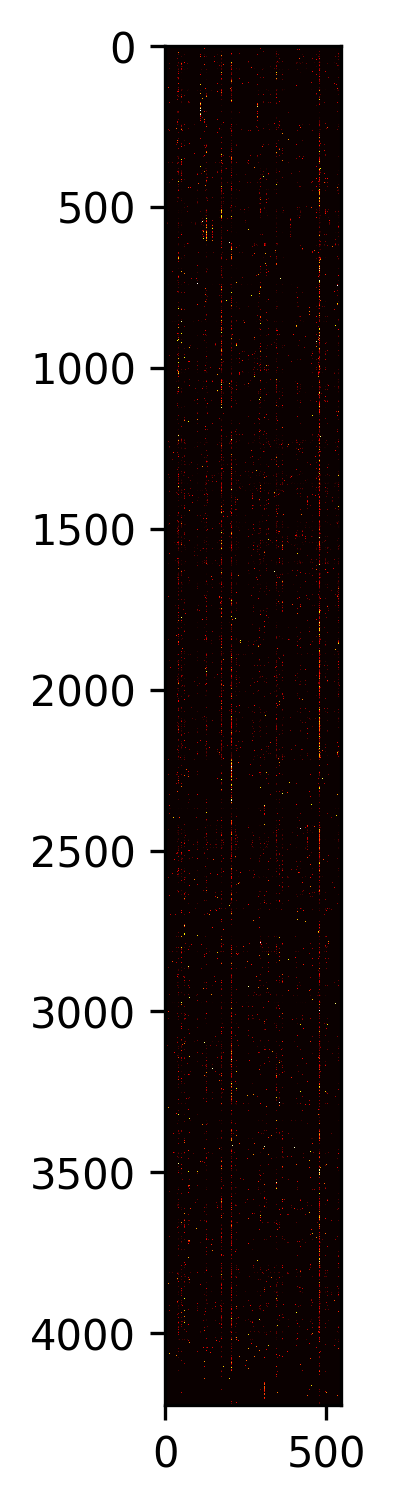

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=300)


documents = { k:list(v) for k, v in C.category_split(level=4).items() }
doc2id = { doc:i for i, doc in enumerate(documents.keys()) }
id2doc = { v:k for k, v in doc2id.items() }


count_mat = []
for doc in doc2id:
    doc = Tagger.encode_doc(documents[doc])
    count_mat.append(doc)
count_mat = np.array(count_mat)
print(count_mat.shape)

# TF-IDF weighting
idf = TfidfTransformer().fit(count_mat)
# print(idf.idf_.shape)
tf_idf_mat = idf.transform(count_mat) #.toarray()
tf_idf_mat.toarray()


# sns.heatmap(tf_idf_mat.toarray(), linewidth=0.5)
# ax = sns.heatmap(tf_idf_mat.toarray(), linewidth=0.5)
plt.imshow(tf_idf_mat.toarray(), cmap='hot', interpolation='nearest')
# ax.set_xticks(range(count_mat.shape[1])) # <--- set the ticks first
plt.show()